## Exercício 1
![alt text](ex1.png)

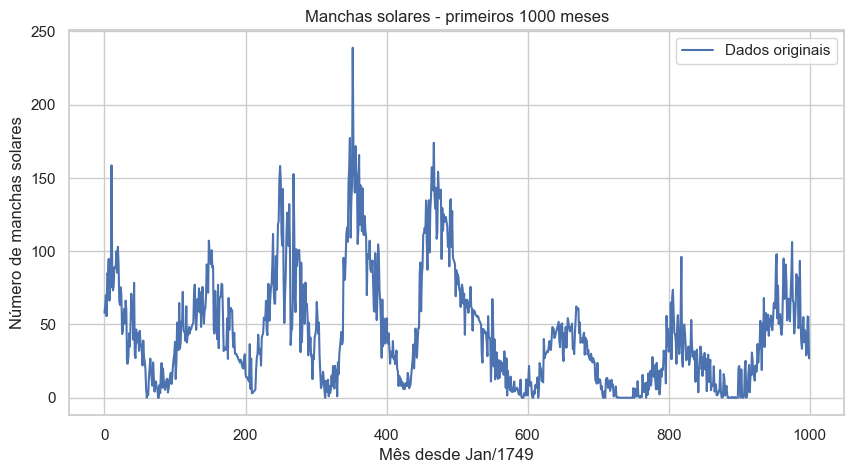

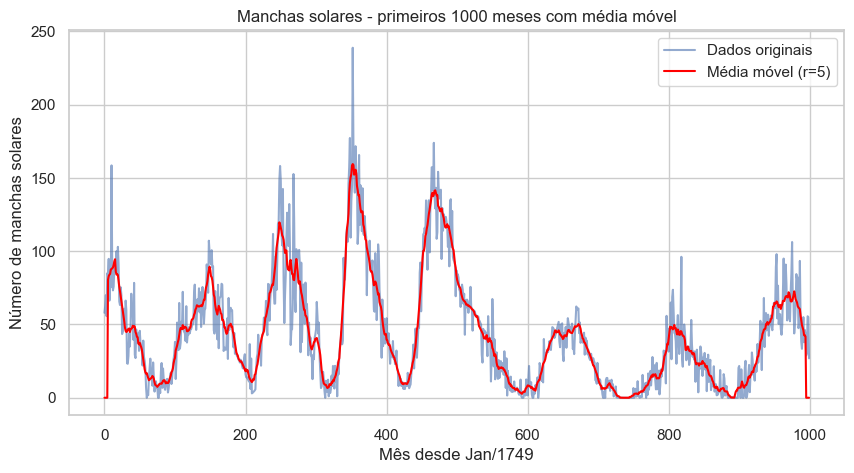

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (a): Leitura dos dados
data = np.loadtxt('sunspots.txt')
months = data[:, 0]
sunspots = data[:, 1]

# Parte (b): Mostrar apenas os primeiros 1000 pontos
months_1000 = months[:1000]
sunspots_1000 = sunspots[:1000]

plt.figure(figsize=(10, 5))
plt.plot(months_1000, sunspots_1000, label='Dados originais')
plt.xlabel('Mês desde Jan/1749')
plt.ylabel('Número de manchas solares')
plt.title('Manchas solares - primeiros 1000 meses')
plt.legend()
plt.grid(True)
plt.show()

# Parte (c): Cálculo da média móvel com r = 5
r = 5
running_avg = np.zeros(len(sunspots_1000))
for k in range(r, len(sunspots_1000) - r):
    running_avg[k] = np.mean(sunspots_1000[k - r : k + r + 1])

# Gráfico dos dados originais e da média móvel
plt.figure(figsize=(10, 5))
plt.plot(months_1000, sunspots_1000, label='Dados originais', alpha=0.6)
plt.plot(months_1000, running_avg, label='Média móvel (r=5)', color='red')
plt.xlabel('Mês desde Jan/1749')
plt.ylabel('Número de manchas solares')
plt.title('Manchas solares - primeiros 1000 meses com média móvel')
plt.legend()
plt.grid(True)
plt.show()


## Exercício 2
![alt text](ex2.png)
![alt text](ex2_2.png)

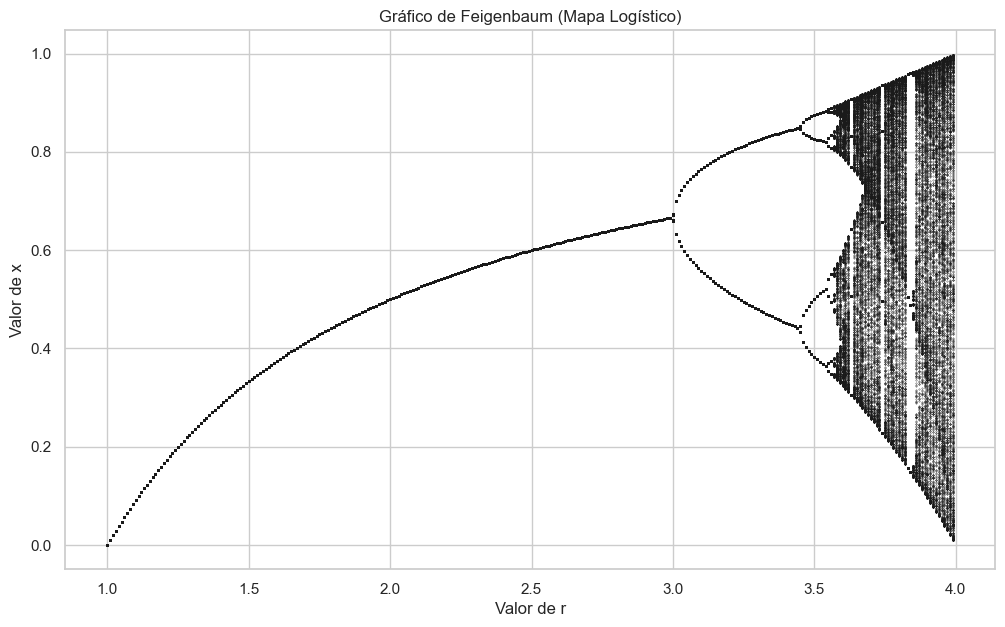

In [43]:
# Parâmetros da simulação
r_values = np.arange(1.0, 4.0, 0.01)
iterations = 1000
last = 1000  # Iterações a serem usadas no gráfico após a estabilização

x0 = 0.5  # Valor inicial de x

# Lista para armazenar os pontos (r, x)
r_list = []
x_list = []

# Loop sobre todos os valores de r
for r in r_values:
    x = x0
    # Iterações para estabilizar
    for _ in range(iterations):
        x = r * x * (1 - x)
    # Iterações para coletar os pontos para o gráfico
    for _ in range(last):
        x = r * x * (1 - x)
        r_list.append(r)
        x_list.append(x)

# Plotagem do gráfico de Feigenbaum
plt.figure(figsize=(12, 7))
plt.plot(r_list, x_list, 'k.', markersize=0.5)
plt.xlabel("Valor de r")
plt.ylabel("Valor de x")
plt.title("Gráfico de Feigenbaum (Mapa Logístico)")
plt.grid(True)
plt.show()


**a) Como aparecem os diferentes comportamentos no gráfico de Feigenbaum?**

* Ponto fixo: Aparece como um único ponto ou uma linha horizontal (para cada r, o valor de x converge para um só número).
* Ciclo limite: Aparece como um conjunto discreto de pontos verticais (por ex., 2, 4 ou 8 pontos para um valor de r).
* Caos: Aparece como uma faixa densa de pontos verticais, com muitos valores diferentes de x para o mesmo r, de forma aparentemente aleatória.

**b) Qual valor de r marca a transição para o caos (borda do caos)?**

 O sistema começa a mostrar comportamento caótico aproximadamente em r = 3.57.

  * Antes disso, há duplicações de ciclos (2, 4, 8...) (bifurcações).
  * Esse ponto é conhecido como o limite do caos (edge of chaos).




## Exercício 3
![alt text](ex3.png)

Tema ambiental escolhido: **Annual deforestation rate hectares per year**

\
Data source: UN Food and Agriculture Organization (FAO). Forest Resources Assessment.

In [ ]:
import pandas as pd

dados = pd.read_csv('annual-deforestation.csv')

# Lista de países que você deseja filtrar
paises_selecionados = ['India', 'Indonesia', 'Tanzania', 'Myanmar', 'Paraguay', 'Brazil']

# Filtrar os dados
dados_filtrados = dados[dados['Entity'].isin(paises_selecionados)]

# Exibir os dados filtrados
display(dados_filtrados) 

,Entity,Code,Year,Deforestation
54,Brazil,BRA,1990,4254800.0
55,Brazil,BRA,2000,5129300.0
56,Brazil,BRA,2010,1867800.0
57,Brazil,BRA,2015,1695700.0
203,India,IND,1990,384000.0
204,India,IND,2000,629500.0
205,India,IND,2010,668400.0
206,India,IND,2015,668400.0
207,Indonesia,IDN,1990,2526000.0
208,Indonesia,IDN,2000,969000.0


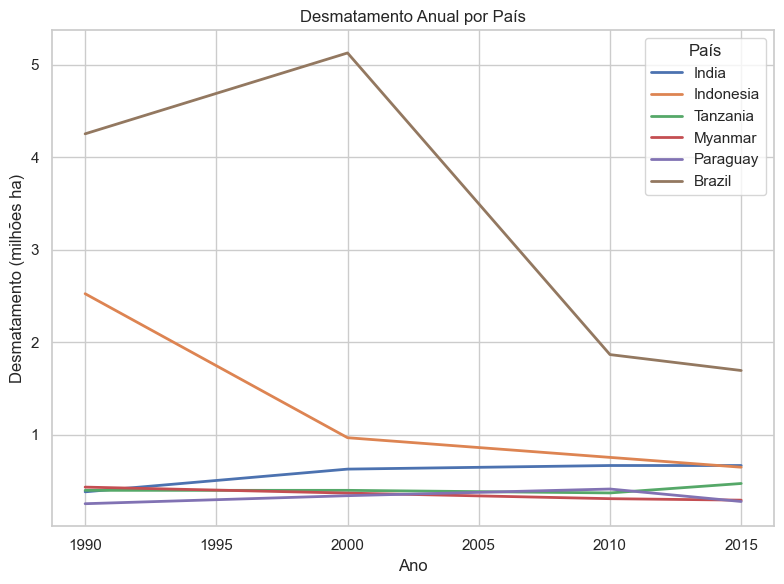

In [ ]:
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Ajustes de estilo
sns.set_theme(style="whitegrid") 

# Garantir ordenação por ano
dados_filtrados = dados_filtrados.sort_values(by='Year')

# Escala em milhoes hectares para visualização mais clara
dados_filtrados['Desmatamento (milhões ha)'] = dados_filtrados['Deforestation'] / 1e6

# Gráfico 1: Linha temporal múltipla
plt.figure(figsize=(8, 6))
for pais in paises_selecionados:
    subset = dados_filtrados[dados_filtrados['Entity'] == pais]
    plt.plot(subset['Year'], subset['Desmatamento (milhões ha)'], label=pais, linewidth=2)
plt.title('Desmatamento Anual por País')
plt.xlabel('Ano')
plt.ylabel('Desmatamento (milhões ha)')
plt.legend(title='País')
plt.tight_layout()
plt.show()

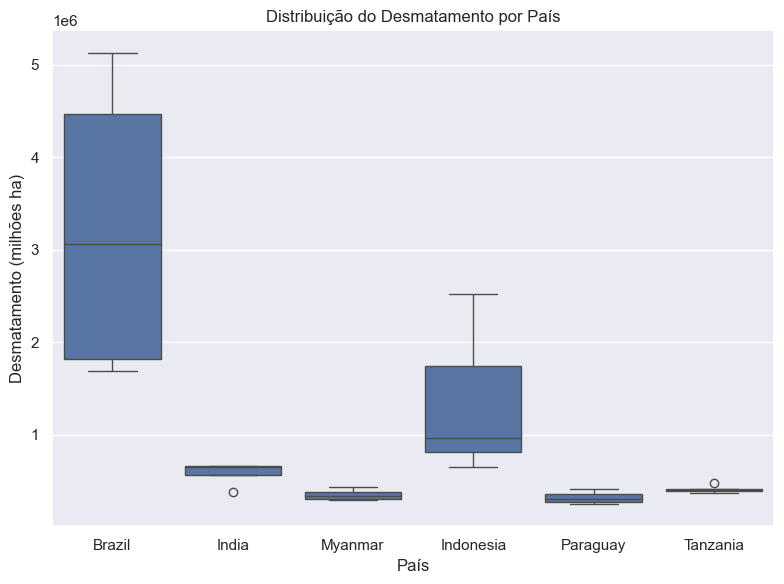

In [32]:
# Gráfico 2: Boxplot comparando distribuições por país
plt.figure(figsize=(8, 6))
sns.boxplot(data=dados_filtrados, x='Entity', y='Deforestation')
plt.title('Distribuição do Desmatamento por País')
plt.xlabel('País')
plt.ylabel('Desmatamento (milhões ha)')
plt.tight_layout()
plt.show()

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

paises_ordenados = paises_selecionados
anos = sorted(dados_filtrados['Year'].unique())

cores_paises = {
    pais: cor for pais, cor in zip(paises_ordenados, px.colors.qualitative.Set1)
}

# Trace inicial (ano 0)
df_ano0 = dados_filtrados[dados_filtrados['Year'] == anos[0]]
y_ano0 = [df_ano0[df_ano0['Entity'] == pais]['Deforestation'].values[0] if not df_ano0[df_ano0['Entity'] == pais].empty else 0 for pais in paises_ordenados]

fig.add_trace(go.Scatter(
    x=paises_ordenados,
    y=y_ano0,
    mode='lines',
    line=dict(color='black', width=1, dash='dot'),
    name='Conexão Geral',
    showlegend=False
))

for pais in paises_ordenados:
    y_val = df_ano0[df_ano0['Entity'] == pais]['Deforestation'].values
    y_val = y_val[0] if len(y_val) > 0 else 0
    fig.add_trace(go.Scatter(
        x=[pais],
        y=[y_val],
        mode='markers',
        marker=dict(size=15, color=cores_paises[pais]),
        name=pais,
        showlegend=False
    ))

frames = []
for ano in anos:
    df_ano = dados_filtrados[dados_filtrados['Year'] == ano]
    y_ano = [df_ano[df_ano['Entity'] == pais]['Deforestation'].values[0] if not df_ano[df_ano['Entity'] == pais].empty else 0 for pais in paises_ordenados]

    data = []
    data.append(go.Scatter(
        x=paises_ordenados,
        y=y_ano,
        mode='lines',
        line=dict(color='black', width=1, dash='dot'),
        showlegend=False
    ))

    for pais in paises_ordenados:
        y_val = df_ano[df_ano['Entity'] == pais]['Deforestation'].values
        y_val = y_val[0] if len(y_val) > 0 else 0
        data.append(go.Scatter(
            x=[pais],
            y=[y_val],
            mode='markers',
            marker=dict(size=15, color=cores_paises[pais]),
            showlegend=False
        ))

    frames.append(go.Frame(data=data, name=str(ano),
                           layout=go.Layout(
                               annotations=[dict(
                                   text=f"Ano: {ano}",
                                   x=0.95,
                                   y=0.95,
                                   xref="paper",
                                   yref="paper",
                                   showarrow=False,
                                   font=dict(size=24, color="black"),
                                   bgcolor="white",
                                   bordercolor="black",
                                   borderwidth=2,
                                   borderpad=4,
                                   align="center"
                               )]
                           )))

updatemenus = [dict(
    type="buttons",
    showactive=False,
    y=1.15,
    x=1.05,
    xanchor="right",
    yanchor="top",
    direction="left",
    buttons=[
        dict(label="Play",
             method="animate",
             args=[None, {"frame": {"duration": 900, "redraw": True}, "fromcurrent": True, "transition": {"duration": 100}}]),
        dict(label="Pause",
             method="animate",
             args=[[None], {"frame": {"duration": 0, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}])
    ]
)]

fig.update_layout(
    title="Desmatamento por País - Animação Interativa",
    xaxis=dict(
        title="País",
        categoryorder='array',
        categoryarray=paises_ordenados
    ),
    yaxis=dict(
        title="Desmatamento (milhões ha)",
        range=[0, 7_000_000]
    ),
    sliders=[],  # remove slider
    updatemenus=updatemenus,
    height=500,
    showlegend=False  # remove legenda
)

fig.frames = frames
fig.show()


<Figure size 1000x600 with 0 Axes>

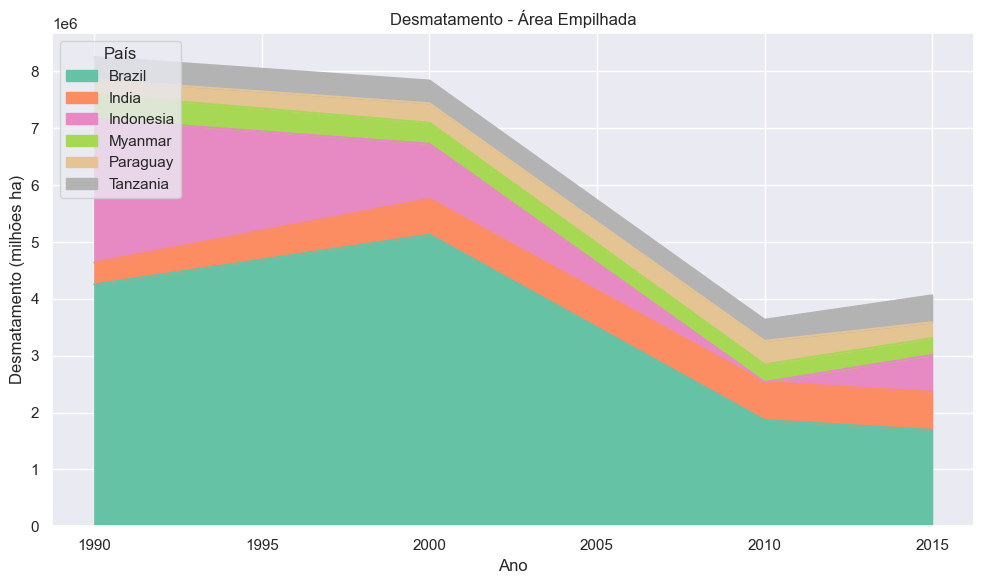

In [34]:
# Gráfico 4: Área empilhada
plt.figure(figsize=(10, 6))
dados_area = dados_filtrados.pivot(index='Year', columns='Entity', values='Deforestation')
dados_area.fillna(0, inplace=True)
dados_area.plot.area(stacked=True, figsize=(10, 6), cmap='Set2')
plt.title('Desmatamento - Área Empilhada')
plt.xlabel('Ano')
plt.ylabel('Desmatamento (milhões ha)')
plt.legend(title='País', loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Gráfico 5 - Mapa de cor para um ano específico

ano_especifico = 1990

# Filtra os dados para o ano específico e apenas os países selecionados
dados_ano = dados[
    (dados['Year'] == ano_especifico) & 
    (dados['Entity'].isin(paises_selecionados))
].copy()

# Cria a coluna de desmatamento em milhões de hectares
dados_ano['Desmatamento (milhões ha)'] = dados_ano['Deforestation'] / 1e6

# Gera o mapa coroplético
fig = px.choropleth(
    dados_ano,
    locations='Code',  # Deve conter os códigos ISO dos países
    color='Desmatamento (milhões ha)',
    hover_name='Entity',
    color_continuous_scale='YlOrRd',
    range_color=[0, 5],  # Limita de 0 até 5 milhões ha
    title=f'Desmatamento em {ano_especifico} (milhões de hectares)'
)

fig.update_layout(height=500)
fig.show()

4. Escreva um mini-relatório (até 500 palavras) com uma leitura crítica da visualização: o que se pode inferir sobre o impacto ambiental? Que país mais chama a atenção?

As visualizações apresentadas oferecem uma perspectiva abrangente sobre o desmatamento global entre 1990 e 2015, com foco em países com maiores perdas florestais. A primeira imagem, um mapa temático de 1990, mostra a distribuição espacial do desmatamento em milhões de hectares. O Brasil se destaca como o país com maior área desmatada nesse ano, com uma coloração vermelho-escuro que representa o pico da escala (5 milhões de hectares). Outras regiões com destaque incluem Indonésia, Índia, Myanmar, Paraguai e partes da África, como a Tanzânia.

A segunda visualização, um gráfico de área empilhada, mostra a evolução do desmatamento em seis países: Brasil, Índia, Indonésia, Myanmar, Paraguai e Tanzânia. Observa-se uma forte redução no desmatamento total entre 2000 e 2010, com destaque para o Brasil, cujo desmatamento cai de cerca de 5,1 milhões de hectares em 2000 para 1,87 milhão em 2010. Isso representa uma redução de mais de 60%, indicando o impacto positivo de políticas públicas e fiscalização ambiental implementadas no período.

A Índia, embora tenha uma área desmatada bem menor que o Brasil, apresenta tendência de crescimento estável e contínuo, o que pode indicar pressão urbana ou agrícola sobre os ecossistemas remanescentes. A Indonésia chama atenção por um comportamento oposto ao brasileiro: inicia com um alto nível de desmatamento (2,5 milhões de ha em 1990), mas com declínio expressivo até 2015. Ainda assim, continua sendo um dos países com maiores perdas absolutas.

Myanmar, Paraguai e Tanzânia apresentam números menores em termos absolutos, mas são relevantes ao se considerar a proporção de área florestal disponível. A Tanzânia, por exemplo, mostra uma tendência de crescimento entre 2010 e 2015, o que pode indicar pressões recentes sobre seus recursos florestais.


O Brasil é o país que mais chama atenção, tanto pela magnitude do desmatamento em 1990 e 2000 quanto pela expressiva redução na década seguinte. Essa trajetória evidencia o potencial de reversão de tendências ambientais negativas mediante políticas eficazes. Em contraste, países como Índia e Tanzânia, mesmo com áreas menores desmatadas, requerem atenção por apresentarem tendências estáveis ou crescentes, o que pode comprometer seus ecossistemas no longo prazo.

